In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
path = '/gdrive/My Drive/ML:Pilot/data/'

In [ ]:
raw_data = pd.read_csv(path + 'online_shoppers_intention.csv')

In [ ]:
raw_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
raw_data.shape

(12330, 18)

In [ ]:
raw_data.isnull().sum(axis=0)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
month_encoder = LabelEncoder()
visitor_encoder = LabelEncoder()
weekend_encoder = LabelEncoder()
revenue_encoder = LabelEncoder()     

In [ ]:
raw_data["Month"] = month_encoder.fit_transform(raw_data["Month"])
raw_data["VisitorType"] = visitor_encoder.fit_transform(raw_data["VisitorType"])
raw_data["Weekend"] = weekend_encoder.fit_transform(raw_data["Weekend"])
raw_data["Revenue"] = revenue_encoder.fit_transform(raw_data["Revenue"])

In [ ]:
x = raw_data.drop(columns= ["Revenue"])
y = raw_data["Revenue"]

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape, y.shape

((12330, 17), (12330,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=1) 

In [ ]:
x_train.shape, x_test.shape

((9247, 17), (3083, 17))

In [ ]:
y_train.shape, y_test.shape

((9247,), (3083,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
fold = StratifiedKFold(n_splits = 5, random_state=1, shuffle = True)
fold.get_n_splits(x_train, y_train)

5

In [ ]:
parameters = {'solver' : ('newton-cg', 'liblinear', 'sag', 'saga'), 'C' : [0.001,10]}

model = LogisticRegression(penalty= 'l2', n_jobs = -2, max_iter = 1000)
log_reg = GridSearchCV(model, parameters, n_jobs = -2, cv = fold)

log_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 10],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(log_reg.best_params_)

{'C': 10, 'solver': 'newton-cg'}


In [ ]:
y_pred_log_reg = log_reg.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred_log_reg)) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2636
           1       0.72      0.38      0.49       447

    accuracy                           0.89      3083
   macro avg       0.81      0.68      0.72      3083
weighted avg       0.88      0.89      0.87      3083



In [ ]:
ac = accuracy_score(y_test, y_pred_log_reg)
print('test accuracy = {}%'.format(ac * 100))

test accuracy = 88.84203697697049%


#<b>KNN</b>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer

f_scorer = make_scorer(fbeta_score, beta =1, pos_label = 1)
params = {'n_neighbors':[1,1500]}

KNN = KNeighborsClassifier(algorithm = 'brute')
knn_grid = GridSearchCV(KNN, params, n_jobs=-2, cv = fold, scoring=f_scorer, verbose=True )

knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    5.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2, param_grid={'n_neighbors': [1, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1, pos_label=1),
             verbose=True)

In [ ]:
print(knn_grid.best_params_)

{'n_neighbors': 1}


In [ ]:
y_pred_knn = knn_grid.predict(x_test)
print(classification_report(y_test, y_pred_knn))

ac = accuracy_score(y_test,y_pred_knn)
print('test accuracy = {}%'.format(ac*100))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2636
           1       0.41      0.41      0.41       447

    accuracy                           0.83      3083
   macro avg       0.66      0.65      0.65      3083
weighted avg       0.83      0.83      0.83      3083

test accuracy = 82.90626013623094%


In [ ]:
error = []
y_train = y_train.ravel()
#for calculating error for  values between 1 and 10

for i in range(1,11):
    knn = KNeighborsClassifier(algorithm='brute', n_neighbors=i)
    print('K value = {}'.format(i))

    knn.fit(x_train, y_train)

    pred_i = knn.predict(x_test)
    print(classification_report(y_test, pred_i))

K value = 1
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2636
           1       0.41      0.41      0.41       447

    accuracy                           0.83      3083
   macro avg       0.66      0.65      0.65      3083
weighted avg       0.83      0.83      0.83      3083

K value = 2
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2636
           1       0.60      0.25      0.35       447

    accuracy                           0.87      3083
   macro avg       0.74      0.61      0.64      3083
weighted avg       0.84      0.87      0.84      3083

K value = 3
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2636
           1       0.54      0.38      0.44       447

    accuracy                           0.86      3083
   macro avg       0.72      0.66      0.68      3083
weighted avg       0.85      0.86     

#<b>Naive Bayes</b>

In [ ]:
from sklearn.naive_bayes import ComplementNB
nb_comp = ComplementNB()
nb_comp.fit(x_train, y_train)

y_pred_nb_comp = nb_comp.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb_comp))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2636
           1       0.59      0.64      0.61       447

    accuracy                           0.88      3083
   macro avg       0.76      0.78      0.77      3083
weighted avg       0.89      0.88      0.88      3083



#<b>Decision Trees</b>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

dtree.fit(x_train, y_train)

y_pred_dtree = dtree.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2636
           1       0.52      0.55      0.54       447

    accuracy                           0.86      3083
   macro avg       0.72      0.73      0.73      3083
weighted avg       0.87      0.86      0.86      3083



In [ ]:
prune_path = dtree.cost_complexity_pruning_path(x_train, y_train)
alphas = prune_path.ccp_alphas 
impurities = prune_path.impurities

new_dtrees = []
i = 0

for alpha in alphas:
    new_dtree = DecisionTreeClassifier(criterion = 'gini', ccp_alpha=alpha)
    new_dtree.fit(x_train, y_train)

    new_dtrees.append(new_dtree)

In [ ]:
test_scores = [new_dtree.score(x_test,y_test) for new_dtree in new_dtrees]
print('max f1 test score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

pruned_dtree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[np.argmax(test_scores)])

pruned_dtree.fit(x_train, y_train)

yt_pred_dtree = pruned_dtree.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, yt_pred_dtree))

max f1 test score = 0.9062601362309439
position of max f1 = 309
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2636
           1       0.74      0.54      0.63       447

    accuracy                           0.91      3083
   macro avg       0.83      0.75      0.79      3083
weighted avg       0.90      0.91      0.90      3083



#<b>AUC AND ROC CURVE</b>

In [ ]:
logreg_probs = log_reg.predict_proba(x_test)
knn_grid_probs = knn_grid.predict_proba(x_test)
nb_comp_probs = nb_comp.predict_log_proba(x_test)
dtree_probs = pruned_dtree.predict_proba(x_test)

In [ ]:
logreg_probs = logreg_probs[:, 1]
knn_grid_probs = knn_grid_probs[:,1]
nb_comp_probs = nb_comp_probs[:,1]
dtree_probs = dtree_probs[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test,logreg_probs)
knn_grid_auc = roc_auc_score(y_test, knn_grid_probs)
nb_comp_auc = roc_auc_score(y_test, nb_comp_probs)
dtree_auc = roc_auc_score(y_test, dtree_probs)

print('Logistic: ROC AUC = {}'.format(round(logreg_auc,3)))
print("KNN: ROC AUC = {}".format(round(knn_grid_auc,3)))
print('NB: ROC AUC = {}'.format(round(nb_comp_auc,3)))
print('DTREE: ROC AUC = {}'.format(round(dtree_auc,3)))

Logistic: ROC AUC = 0.889
KNN: ROC AUC = 0.655
NB: ROC AUC = 0.75
DTREE: ROC AUC = 0.909


In [ ]:
from sklearn.metrics import roc_curve

logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_test, logreg_probs)
knn_fpr, knn_tpr, knn_thres = roc_curve(y_test, knn_grid_probs)
nb_fpr, nb_tpr, nb_thres = roc_curve(y_test, nb_comp_probs)
dtree_fpr, dtree_tpr, dtree_thres = roc_curve(y_test, dtree_probs) 

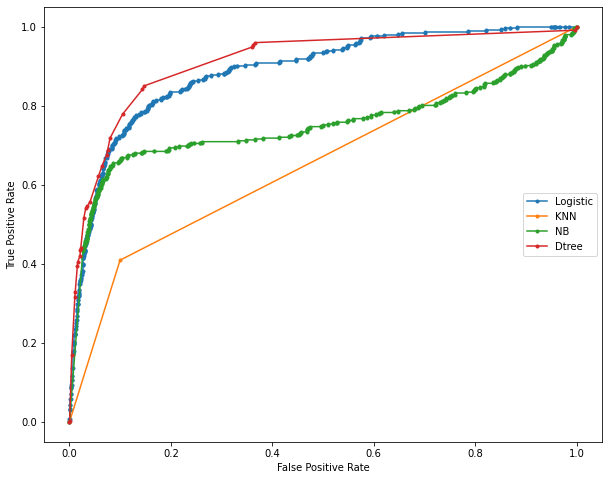

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax.plot(nb_fpr, nb_tpr, marker='.', label='NB')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label = 'Dtree')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 5)

plt.show()

#<b>ENSEMBLE</b>

#<i>random forest </i>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf)) 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2636
           1       0.72      0.56      0.63       447

    accuracy                           0.90      3083
   macro avg       0.82      0.76      0.79      3083
weighted avg       0.90      0.90      0.90      3083



In [ ]:
rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('random Forest: ROC AUC = {}%'.format(round(rf_auc,3)))

random Forest: ROC AUC = 0.93%


In [ ]:
rf_fpr, rf_tpr, rf_thres = roc_curve(y_test, rf_probs)

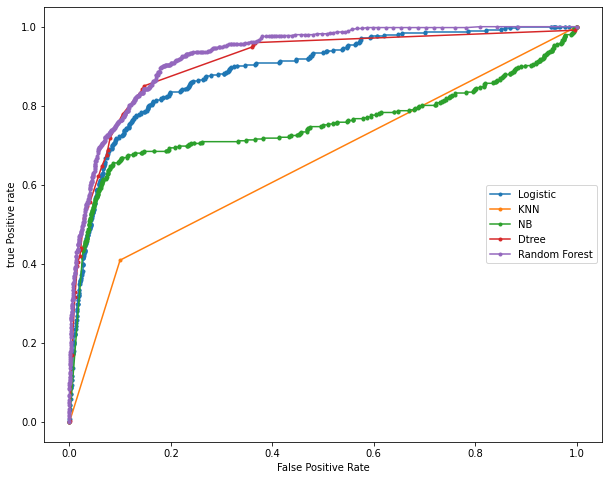

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax.plot(nb_fpr, nb_tpr, marker='.', label='NB')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label = 'Dtree')
ax.plot(rf_fpr,rf_tpr,marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')

plt.legend(loc = 5)

plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
x_train, x_train_lr, y_train, y_train_lr = train_test_split(x_train, y_train, test_size=0.60, shuffle=True)

rf = RandomForestClassifier(n_estimators=1000)

rf.fit(x_train, y_train)

rf_enc = OneHotEncoder()

rf_enc.fit(rf.apply(x_train))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
fold.get_n_splits(x_train, y_train)

parameters = {'solver' : ('newton-cg','liblinear','sag','saga'), 'C': [0.001,10]}

model = LogisticRegression(penalty='l2', n_jobs=-2, max_iter=1000)                                                                       
rf_lr = GridSearchCV(model, parameters, n_jobs=-2, cv=fold)

rf_lr.fit(rf_enc.transform(rf.apply(x_train_lr)), y_train_lr)
print(rf_lr.best_params_)

{'C': 0.001, 'solver': 'liblinear'}


In [ ]:
yprobs_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(x_test)))
y_probs_rf_lr = yprobs_rf_lr[:, 1]

In [ ]:
fpr_rf_lr, tpr_rf_lr, thres_rf_lr = roc_curve(y_test,y_probs_rf_lr)

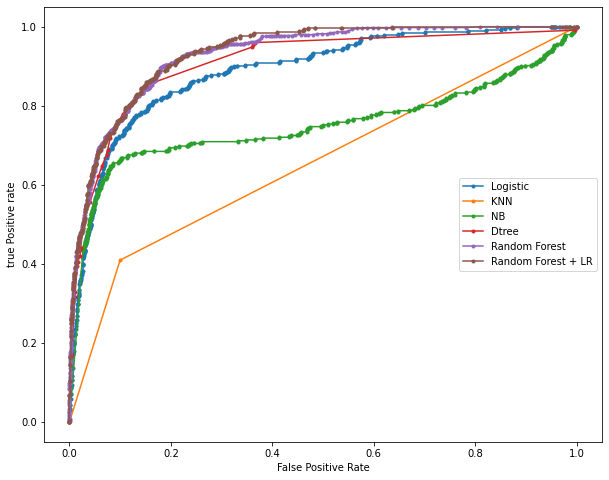

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax.plot(nb_fpr, nb_tpr, marker='.', label='NB')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label = 'Dtree')
ax.plot(rf_fpr,rf_tpr,marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest + LR')

plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')

plt.legend(loc = 5)

plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grd = GradientBoostingClassifier(n_estimators=1000, loss='deviance',learning_rate=0.01)

grd.fit(x_train,y_train)

y_probs_grd = grd.predict_proba(x_test)[:,1]
fpr_grd, tpr_grd,thres_grd = roc_curve(y_test, y_probs_grd)

fpr_grd_auc = roc_auc_score(y_test, y_probs_grd)

print('Gradient Boosting: ROC AUC = {}'.format(round(fpr_grd_auc,3)))

Gradient Boosting: ROC AUC = 0.93


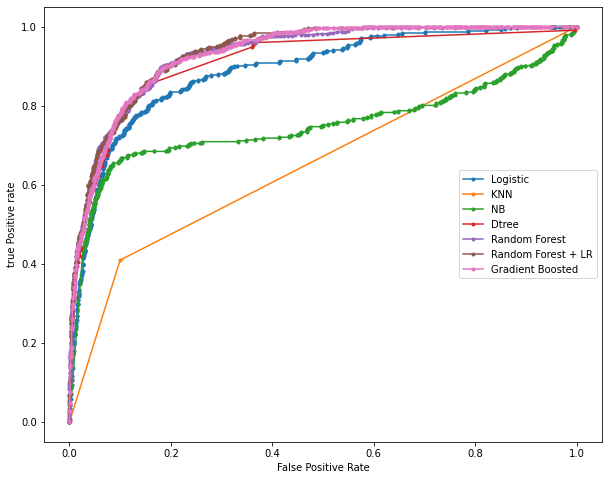

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax.plot(nb_fpr, nb_tpr, marker='.', label='NB')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label = 'Dtree')
ax.plot(rf_fpr,rf_tpr,marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest + LR')
ax.plot(fpr_grd, tpr_grd, marker='.', label='Gradient Boosted')


plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')

plt.legend(loc = 5)

plt.show()

In [ ]:
x_train, x_train_lr, y_train, y_train_lr = train_test_split(x_train, y_train, test_size=0.60, shuffle= True)

grd = GradientBoostingClassifier(n_estimators=1000, loss='deviance', learning_rate=0.01)

grd.fit(x_train, y_train)

grd_enc = OneHotEncoder()

grd_leaves = grd.apply(x_train)[:,:,0]

grd_enc.fit(grd_leaves)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
fold.get_n_splits(x_train, y_train)

parameters = {'solver':('newton-cg','liblinear','sag','saga'), 'C':[0.01,10]}

model = LogisticRegression(penalty='l2', n_jobs=-2, max_iter=1000)
grd_lr = GridSearchCV(model, parameters, n_jobs=-2, cv=fold)

grd_leaves = grd.apply(x_train_lr)[:,:,0]

x_train_lr = grd_enc.transform(grd_leaves)
grd_lr.fit(x_train_lr,y_train_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.01, 10],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
tgrd_leaves = grd.apply(x_test)[:,:,0]

tgrd_fea = grd_enc.transform(tgrd_leaves)

yprobs_grd_lr = grd_lr.predict_proba(tgrd_fea)[:,1]

fpr_grd_lr, tpr_grd_lr, thres_grd_lr = roc_curve(y_test, yprobs_grd_lr)

fpr_grd_lr_auc = roc_auc_score(y_test, yprobs_grd_lr)

print('Gradient boosting and log reg: ROC AUC= {}%'.format(round(fpr_grd_lr_auc,3)))

Gradient boosting and log reg: ROC AUC= 0.925%


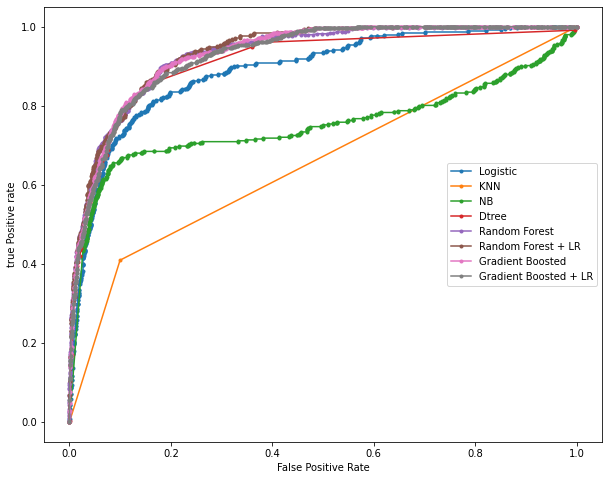

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax.plot(nb_fpr, nb_tpr, marker='.', label='NB')
ax.plot(dtree_fpr, dtree_tpr, marker='.', label = 'Dtree')
ax.plot(rf_fpr,rf_tpr,marker='.', label='Random Forest')
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest + LR')
ax.plot(fpr_grd, tpr_grd, marker='.', label='Gradient Boosted')
ax.plot(fpr_grd_lr, tpr_grd_lr, marker='.', label='Gradient Boosted + LR')


plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')

plt.legend(loc = 5)

plt.show()